In [123]:
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np



In [124]:


file_path = "keplerdata1.fits"



In [125]:

# 2. Read the FITS file
lc = lk.read(file_path)



In [126]:

normalized_lc = lc.remove_nans().normalize(unit='ppm') 



In [127]:
durations = np.linspace(0.05, 0.2, 20)
bls = normalized_lc.to_periodogram(
    method='bls',
    period=np.arange(0.5, 15, 0.01),
    duration=durations,
    oversample=10
)



In [128]:
best_fit_period = bls.period_at_max_power
best_fit_t0 = bls.transit_time_at_max_power
best_fit_duration = bls.duration_at_max_power



In [129]:
# 6. Fold the light curve at the best period
folded_lc = normalized_lc.fold(
    period=best_fit_period,
    epoch_time=best_fit_t0   # changed from t0 to epoch_time
)


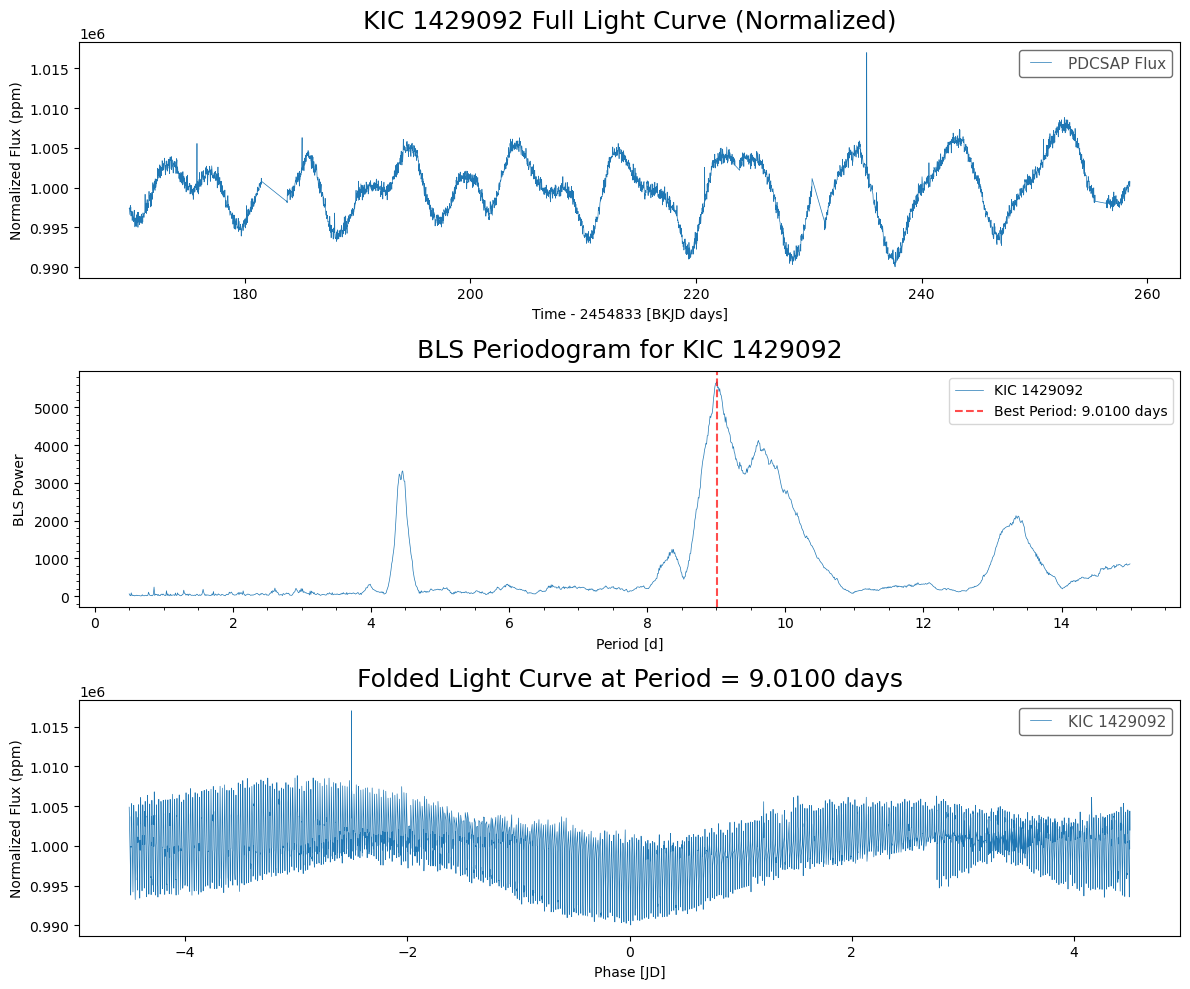

In [130]:
# Create 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Plot 1: Full Light Curve
normalized_lc.plot(ax=axes[0], 
                   title=f'KIC {normalized_lc.targetid} Full Light Curve (Normalized)', 
                   label='PDCSAP Flux')
axes[0].set_ylabel('Normalized Flux (ppm)')

# Plot 2: BLS Periodogram
bls.plot(ax=axes[1], title=f'BLS Periodogram for KIC {normalized_lc.targetid}')
axes[1].axvline(best_fit_period.value, color='red', linestyle='--', alpha=0.7, 
                label=f'Best Period: {best_fit_period.value:.4f} days')
axes[1].legend()

# Plot 3: Folded Light Curve
folded_lc.plot(ax=axes[2], 
               title=f'Folded Light Curve at Period = {best_fit_period.value:.4f} days')
axes[2].set_ylabel('Normalized Flux (ppm)')

# Show all plots together
plt.tight_layout()
plt.show()
